Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder_1 (SimpleRNN)        (None, 4, 64)             6144      
_________________________________________________________________
Encoder_2 (LSTM)             (None, 4, 32)             12416     
_________________________________________________________________
Encoder_3 (GRU)              (None, 16)                2400      
_________________________________________________________________
Encoder_Decoder_bridge (Repe (None, 4, 16)             0         
_________________________________________________________________
Decoder_1 (GRU)              (None, 4, 16)             1632      
_________________________________________________________________
Decoder_2 (LSTM)             (None, 4, 32)             6272      
_________________________________________________________________
Decoder_3 (SimpleRNN)        (None, 4, 64)             6

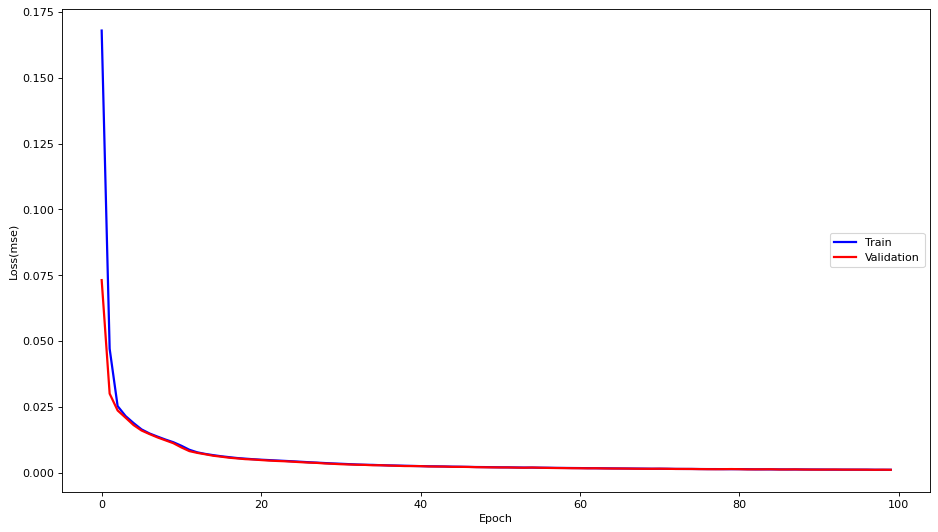

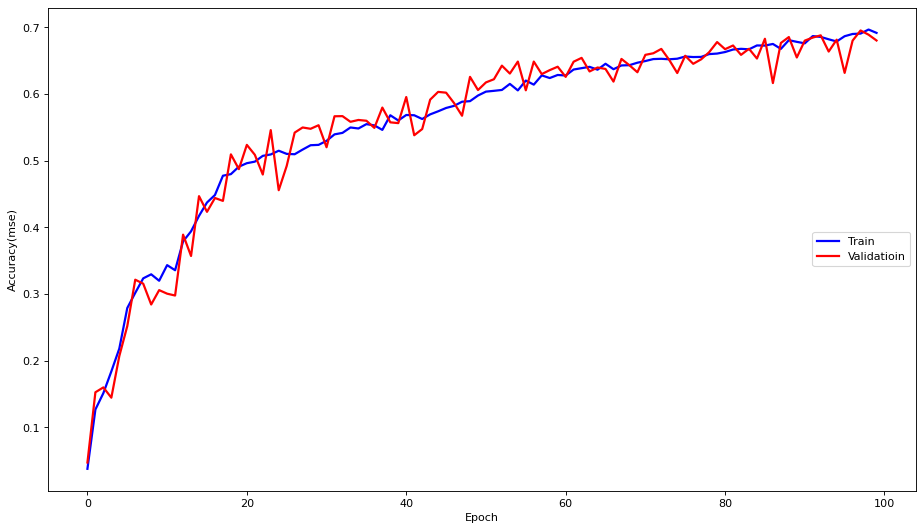

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def Splitting_dataset(data, window_size, scale=True, scaler_type=MinMaxScaler):
        _l = len(data) 
        data = scaler_type().fit_transform(data)
        Xs = []
        Ys = []
        for i in range(0, (len(data) - window_size)):
            Xs.append(data[i:i+window_size])
            Ys.append(data[i:i+window_size])
        tr_x, ts_x, tr_y, ts_y = [np.array(x) for x in train_test_split(Xs, Ys)]
        assert tr_x.shape[2] == ts_x.shape[2] == (data.shape[1] if (type(data) == np.ndarray) else len(data))
        return  (tr_x.shape[2], tr_x, tr_y, ts_x, ts_y)

def Model(window_length, feature_number,cell_type,loss_type, optimizer_type):
        model = keras.Sequential()
        if cell_type ==0:
            model.add(keras.layers.SimpleRNN(64, kernel_initializer='glorot_uniform', batch_input_shape=(None, window_length, feature_number), return_sequences=True, name='Encoder_1'))
            model.add(keras.layers.LSTM(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Encoder_2'))
            model.add(keras.layers.GRU(16, kernel_initializer='glorot_uniform', return_sequences=False, name='Encoder_3'))
            model.add(keras.layers.RepeatVector(window_length, name='Encoder_Decoder_bridge'))
            model.add(keras.layers.GRU(16, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_1'))
            model.add(keras.layers.LSTM(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_2'))
            model.add(keras.layers.SimpleRNN(64, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_3'))
            model.add(keras.layers.TimeDistributed(keras.layers.Dense(feature_number)))
            
        if cell_type ==1:
            model.add(keras.layers.SimpleRNN(64, kernel_initializer='glorot_uniform', batch_input_shape=(None, window_length, feature_number), return_sequences=True, name='Encoder_1'))
            model.add(keras.layers.SimpleRNN(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Encoder_2'))
            model.add(keras.layers.SimpleRNN(16, kernel_initializer='glorot_uniform', return_sequences=False, name='Encoder_3'))
            model.add(keras.layers.RepeatVector(window_length, name='Encoder_Decoder_bridge'))
            model.add(keras.layers.SimpleRNN(16, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_1'))
            model.add(keras.layers.SimpleRNN(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_2'))
            model.add(keras.layers.SimpleRNN(64, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_3'))
            model.add(keras.layers.TimeDistributed(keras.layers.Dense(feature_number)))
        
        if cell_type ==2:
            model.add(keras.layers.LSTM(64, kernel_initializer='glorot_uniform', batch_input_shape=(None, window_length, feature_number), return_sequences=True, name='Encoder_1'))
            model.add(keras.layers.LSTM(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Encoder_2'))
            model.add(keras.layers.LSTM(16, kernel_initializer='glorot_uniform', return_sequences=False, name='Encoder_3'))
            model.add(keras.layers.RepeatVector(window_length, name='Encoder_Decoder_bridge'))
            model.add(keras.layers.LSTM(16, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_1'))
            model.add(keras.layers.LSTM(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_2'))
            model.add(keras.layers.LSTM(64, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_3'))
            model.add(keras.layers.TimeDistributed(keras.layers.Dense(feature_number)))
        
        if cell_type==3:
            model.add(keras.layers.GRU(64, kernel_initializer='glorot_uniform', batch_input_shape=(None, window_length, feature_number), return_sequences=True, name='Encoder_1'))
            model.add(keras.layers.GRU(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Encoder_2'))
            model.add(keras.layers.GRU(16, kernel_initializer='glorot_uniform', return_sequences=False, name='Encoder_3'))
            model.add(keras.layers.RepeatVector(window_length, name='Encoder_Decoder_bridge'))
            model.add(keras.layers.GRU(16, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_1'))
            model.add(keras.layers.GRU(32, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_2'))
            model.add(keras.layers.GRU(64, kernel_initializer='glorot_uniform', return_sequences=True, name='Decoder_3'))
            model.add(keras.layers.TimeDistributed(keras.layers.Dense(feature_number)))
        
        model.compile(loss=loss_type,optimizer=optimizer_type,metrics=['accuracy'])
        model.build()
        return model

        
def Summary(model):
    print(model.summary())

def trainloss(model,data_X):
    x_train_pred = model.predict(data_X)
    train_loss = np.square(np.mean(np.abs(x_train_pred - data_X), axis=1))

def testloss(model, data_XX):
    x_test_pred = model.predict(data_XX)
    test_loss = np.square(np.mean(np.abs(x_test_pred - data_XX),axis=1))

def get_threshold(train_loss):
    threshold = np.max(train_loss)
    print (threshold)

if __name__ == '__main__':
    data = pd.read_csv('c172_file_1.csv')
    
    cell_type = 0
    window_size= 4
    epoch = 100
    batch = 100
    window_length = 4
    loss_type = "mse"
    optimizer_type = "adam"
    
    labels, X, Y, XX, YY = Splitting_dataset(data, window_size)
    demo = Model(window_length, labels, cell_type, loss_type, optimizer_type)
    
    Summary(demo)
    
    history = demo.fit(x=X, y=Y, validation_data=(XX, YY), epochs=epoch, batch_size=batch, shuffle=True).history
    
    fig, loss_validation= plt.subplots(figsize=(14,8), dpi=80)
    loss_validation.plot(history['loss'],'b',label = 'Train',linewidth=2)
    loss_validation.plot(history['val_loss'],'r',label = 'Validation',linewidth=2)
    loss_validation.set_xlabel('Epoch')
    loss_validation.set_ylabel('Loss(mse)')
    loss_validation.legend(loc='center right')
    
    fig, accuracy_validation= plt.subplots(figsize=(14,8), dpi=80)
    accuracy_validation.plot(history['accuracy'],'b',label = 'Train',linewidth=2)
    accuracy_validation.plot(history['val_accuracy'],'r',label = 'Validatioin',linewidth=2)
    accuracy_validation.set_xlabel('Epoch')
    accuracy_validation.set_ylabel('Accuracy(mse)')
    accuracy_validation.legend(loc='center right')
    